In [ ]:
import datetime
import pandas as pd
import numpy as np
import subprocess

from google.colab import data_table
data_table.enable_dataframe_formatter()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('seaborn-v0_8')
#plt.style.use('Solarize_Light2')

In [ ]:
# First, we'll read the provided labeled training data
xl_url = '/content/drive/MyDrive/MMAI_831/ADAS16/Dataset.xlsx'
df = pd.read_excel(xl_url, sheet_name='Format')

#Favourite and Least Favourite Words EDA

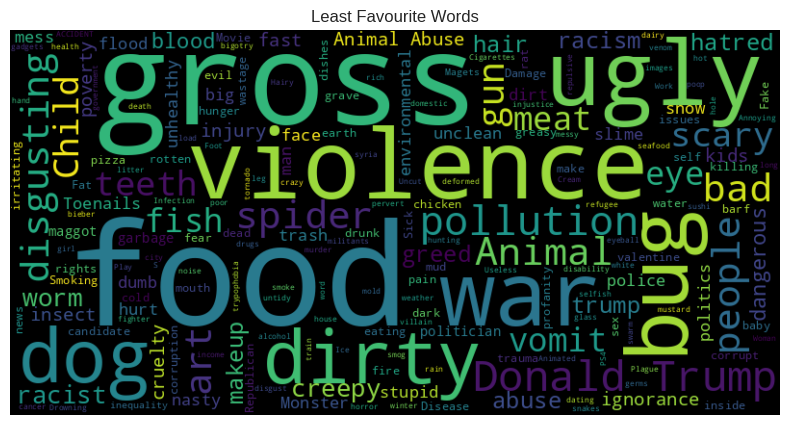

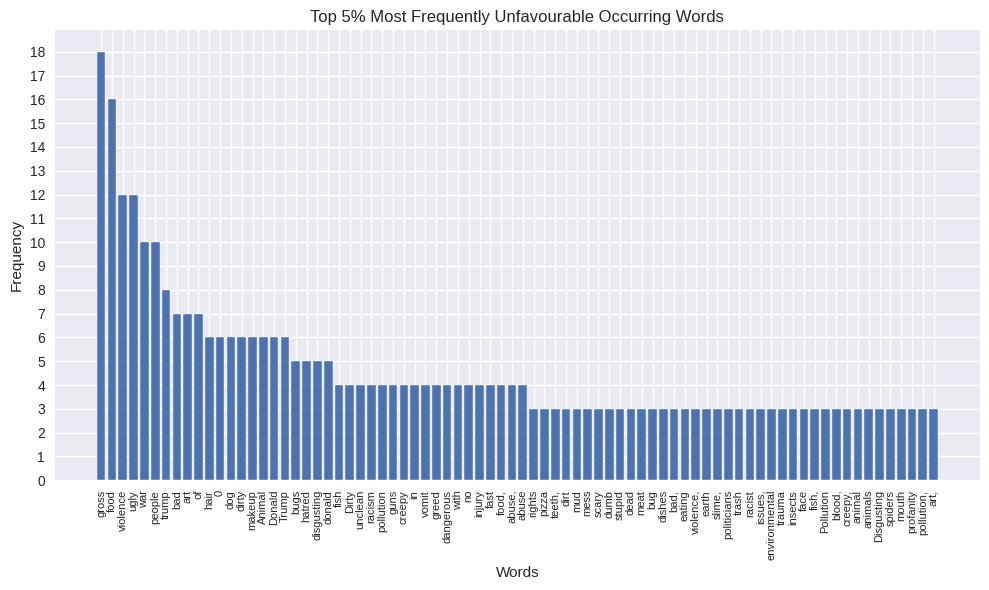

In [ ]:
from wordcloud import WordCloud
from collections import Counter

unfave_df = pd.DataFrame()
# Select the column you want to generate a word cloud from
selected_columns = ['unfave1-descr', 'unfave2-descr', 'unfave3-descr','unfave4-descr','unfave5-descr']
# Concatenate the selected columns into a single column
unfave_df['combined_column'] = df[selected_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
text = ' '.join(unfave_df['combined_column'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title('Least Favourite Words')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Historgram of the word frequency
words = text.split()
# Count the frequency of each word
word_counts = Counter(words)
# Determine the threshold for the top 10% most frequent words
total_words = len(words)
threshold = int(total_words * 0.05)
# Extract the top 10% most frequent words and their frequencies
top_words = dict(word_counts.most_common(threshold))
# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel('Frequency')
plt.yticks(range(max(top_words.values()) + 1))
plt.title('Top 5% Most Frequently Unfavourable Occurring Words')
plt.tight_layout()
plt.show()

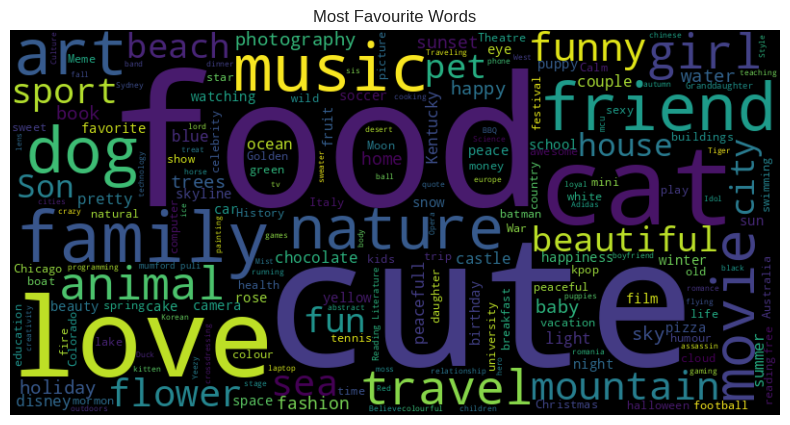

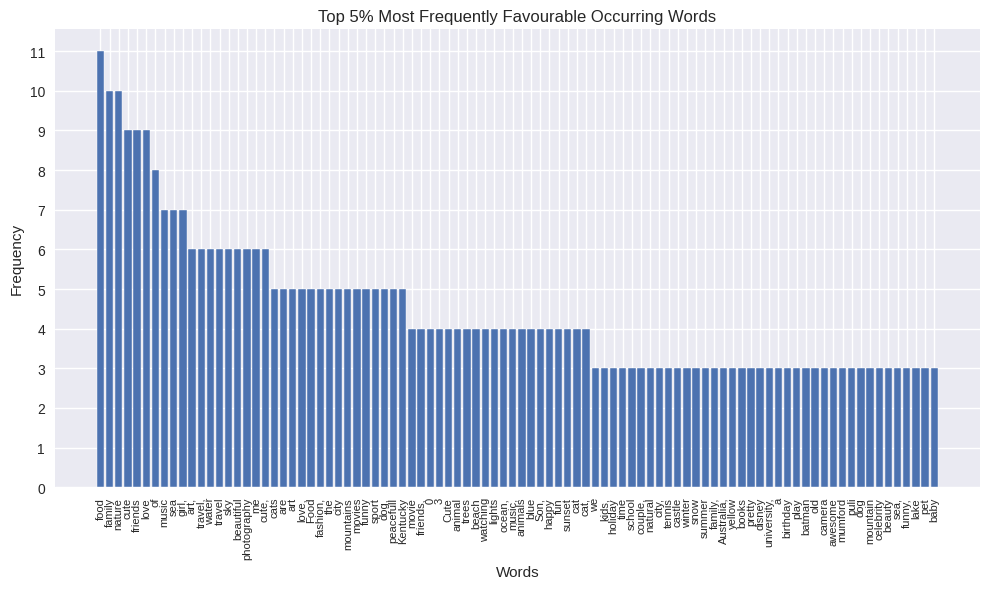

In [ ]:
fave_df = pd.DataFrame()
# Select the column you want to generate a word cloud from
selected_columns = ['fave1-descr', 'fave2-descr', 'fave3-descr','fave4-descr','fave5-descr']
# Concatenate the selected columns into a single column
fave_df['combined_column'] = df[selected_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

text = ' '.join(fave_df['combined_column'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title('Most Favourite Words')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

conjunctions = ['and', 'but', 'or', 'nor', 'so', 'yet', 'my', 'in']  # Add more if needed
# Remove conjunctions from the text
text = ' '.join([word for word in text.split() if word.lower() not in conjunctions])

#Historgram of the word frequency
words = text.split()
# Count the frequency of each word
word_counts = Counter(words)
# Determine the threshold for the top 10% most frequent words
total_words = len(words)
threshold = int(total_words * 0.05)
# Extract the top 10% most frequent words and their frequencies
top_words = dict(word_counts.most_common(threshold))
# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel('Frequency')
plt.yticks(range(max(top_words.values()) + 1))
plt.title('Top 5% Most Frequently Favourable Occurring Words')
plt.tight_layout()
plt.show()

#OCEAN Personality EDA

In [ ]:
ocean_df = pd.DataFrame()
# Select the column you want to generate a word cloud from
selected_columns = ['Q 1', 'Q 2','Q 3','Q 4','Q 5','Q 6','Q 7','Q 8', 'Q 9','Q 10']
# Create the new DataFrame with the selected columns
ocean_df = df[selected_columns].copy()
ocean_df.rename(columns=lambda x: x.replace(" ", ""), inplace=True)
ocean_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,2,-2,0,-1,0,-2,2,-1,1
1,2,0,2,-2,-1,-1,2,0,2,1
2,-1,2,0,2,0,2,-1,2,-1,2
3,1,1,-1,0,-1,0,-1,1,0,1
4,1,2,1,1,-1,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...
115,1,-2,1,-1,-1,-1,2,1,2,-1
116,1,2,-2,1,0,-1,-1,2,-1,-1
117,1,1,2,1,0,-1,0,0,1,1
118,1,1,-1,-1,-1,1,1,1,1,1


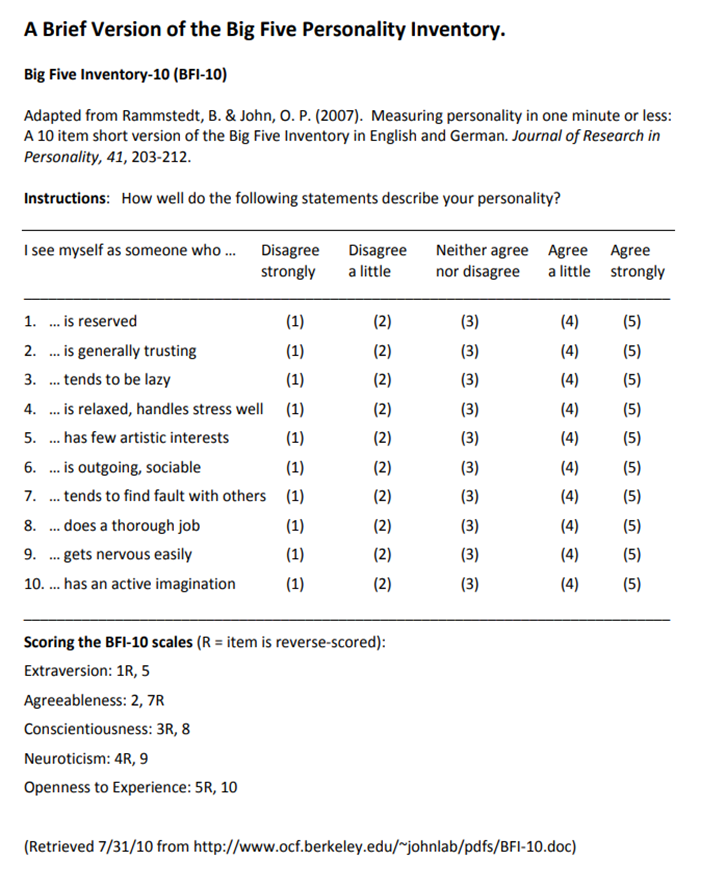

In [ ]:
# Define the questions corresponding to each OCEAN dimension
ocean_questions = {
    'Openness': ['Q1', 'Q2'],
    'Conscientiousness': ['Q3', 'Q4'],
    'Extraversion': ['Q5', 'Q6'],
    'Agreeableness': ['Q7', 'Q8'],
    'Neuroticism': ['Q9', 'Q10']
}

#Questions with reverse scoring
ocean_df['Q1'] *= -1
ocean_df['Q3'] *= -1
ocean_df['Q4'] *= -1
ocean_df['Q5'] *= -1
ocean_df['Q7'] *= -1

# Step 2: Calculate Trait Scores
# Calculate the scores for each trait based on the responses to the relevant questions
ocean_df['openness_score'] = ocean_df['Q1'] + ocean_df['Q5']
ocean_df['conscientiousness_score'] = ocean_df['Q3'] + ocean_df['Q8']
ocean_df['extraversion_score'] = ocean_df['Q1']+ ocean_df['Q5']
ocean_df['agreeableness_score'] = ocean_df['Q2']+ ocean_df['Q7']
ocean_df['neuroticism_score'] = ocean_df['Q4']+ ocean_df['Q9']

user_ratings_df = pd.DataFrame()
user_ratings_df['openness_rating'] = (ocean_df['openness_score'] + 4) * (5 / 8)
user_ratings_df['conscientiousness_rating'] = (ocean_df['conscientiousness_score'] + 4) * (5 / 8)
user_ratings_df['extraversion_rating'] = (ocean_df['extraversion_score'] + 4) * (5 / 8)
user_ratings_df['agreeableness_rating'] = (ocean_df['Q7'] + ocean_df['Q8'] + 4) * (5 / 8)
user_ratings_df['neuroticism_rating'] = (ocean_df['Q9'] + ocean_df['Q10'] + 4) * (5 / 8)

#ocean_df
user_ratings_df

,openness_rating,conscientiousness_rating,extraversion_rating,agreeableness_rating,neuroticism_rating
0,2.500,5.000,2.500,5.000,2.500
1,1.875,1.250,1.875,1.250,4.375
2,3.125,3.750,3.125,4.375,3.125
3,2.500,3.750,2.500,3.750,3.125
4,2.500,3.125,2.500,3.750,3.750
...,...,...,...,...,...
115,2.500,2.500,2.500,1.875,3.125
116,1.875,5.000,1.875,4.375,1.250
117,1.875,1.250,1.875,2.500,3.750
118,2.500,3.750,2.500,2.500,3.750


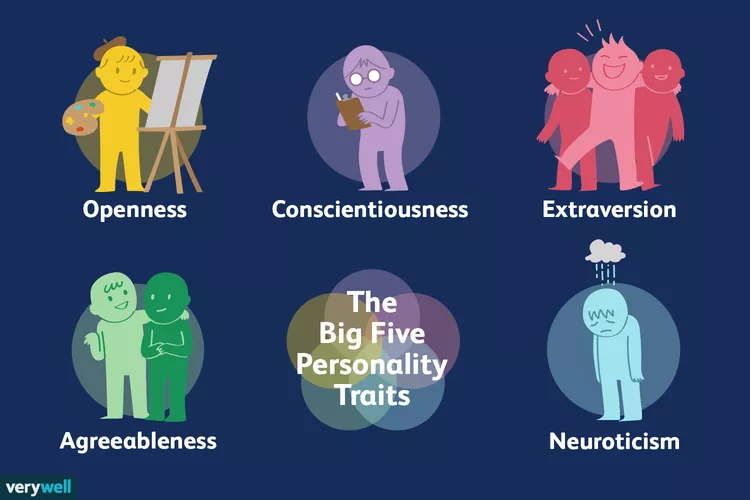

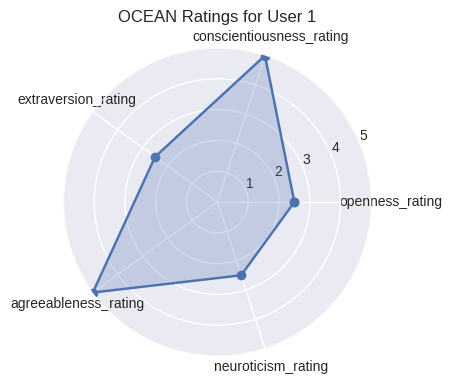

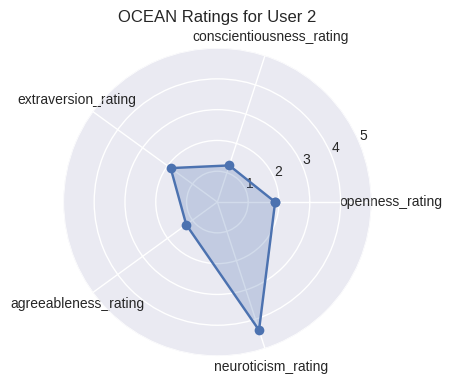

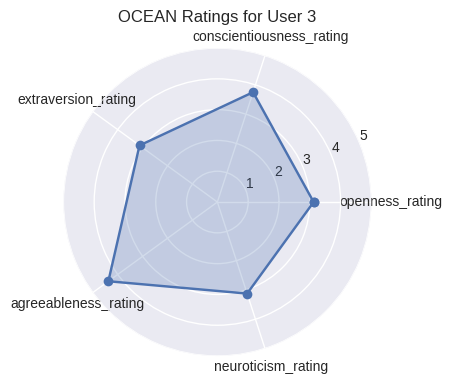

In [ ]:
# Define the OCEAN dimensions
dimensions = ['openness_rating', 'conscientiousness_rating', 'extraversion_rating', 'agreeableness_rating', 'neuroticism_rating']

# Get the user ratings for each dimension
ratings = user_ratings_df[dimensions].values

# Iterate over each user
for i in range(3):
    # Get the ratings for the current user
    user_ratings = ratings[i]

    # Create an array of angles for each dimension
    angles = np.linspace(0, 2 * np.pi, len(dimensions), endpoint=False).tolist()

    # Add the first angle to the end to close the plot
    angles.append(angles[0])

    # Plot the spider chart for the current user
    plt.figure(figsize=(4, 4))
    plt.polar(angles, np.concatenate((user_ratings, [user_ratings[0]])), marker='o')
    plt.fill(angles, np.concatenate((user_ratings, [user_ratings[0]])), alpha=0.25)

    # Set the labels for each axis
    plt.xticks(angles[:-1], dimensions)
    plt.ylim(0, 5)
    # Set the title and show the chart
    plt.title(f'OCEAN Ratings for User {i+1}')
    plt.show()


In [ ]:
from sklearn.cluster import KMeans
# Get the OCEAN ratings for clustering
ratings = user_ratings_df[dimensions].values

# Define the number of clusters
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters,n_init=10)
clusters = kmeans.fit_predict(ratings)

# Add the cluster labels to the DataFrame
user_ratings_df['Cluster'] = clusters

# Print the resulting DataFrame with cluster labels
user_ratings_df

,openness_rating,conscientiousness_rating,extraversion_rating,agreeableness_rating,neuroticism_rating,Cluster
0,2.500,5.000,2.500,5.000,2.500,2
1,1.875,1.250,1.875,1.250,4.375,0
2,3.125,3.750,3.125,4.375,3.125,4
3,2.500,3.750,2.500,3.750,3.125,2
4,2.500,3.125,2.500,3.750,3.750,1
...,...,...,...,...,...,...
115,2.500,2.500,2.500,1.875,3.125,0
116,1.875,5.000,1.875,4.375,1.250,2
117,1.875,1.250,1.875,2.500,3.750,0
118,2.500,3.750,2.500,2.500,3.750,1


45


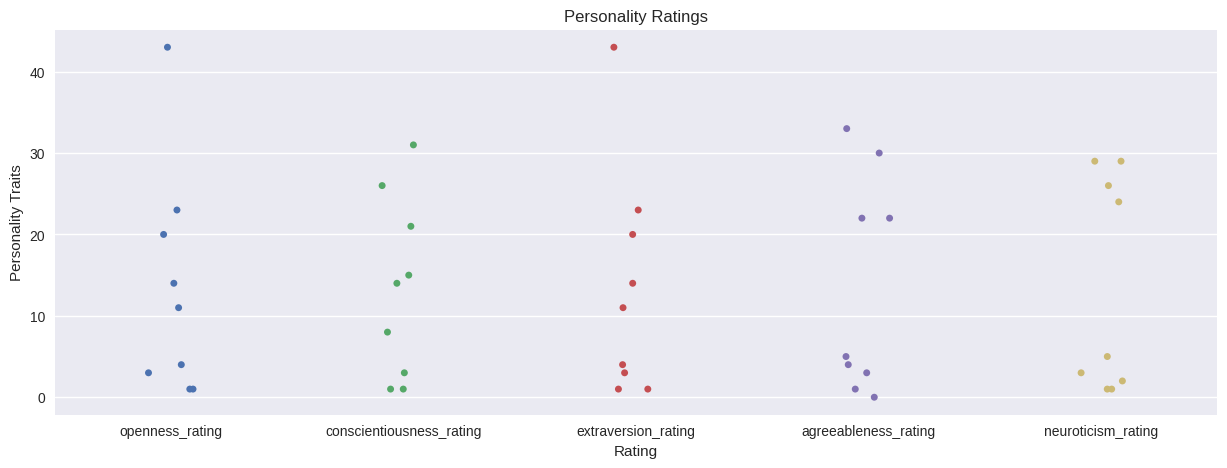

In [ ]:
#Need to fix the plot somehow
# Create a strip plot
fig, ax = plt.subplots(figsize=(15, 5))

# Calculate the count of occurrences for each column
value_counts = user_ratings_df.drop('Cluster', axis=1).apply(lambda x: x.value_counts()).fillna(0)
# Flatten the count values into an array
size_array = value_counts.to_numpy().flatten()
print(len(size_array))
sns.stripplot(data=value_counts, ax=ax)
# Set the plot title and labels
ax.set_title('Personality Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Personality Traits')

# Display the plot
plt.show()

#Clicked vs. Not Clicked EDA

In [ ]:
# Create a new DataFrame with the last 200 columns
#Format is Ad Category - Ad #- AdType 
last_200_columns = df.columns[-300:]
click_noclick_df = pd.DataFrame()
click_noclick_df = df[last_200_columns]
click_noclick_df = click_noclick_df.apply(pd.to_numeric, errors='coerce')
click_noclick_df = click_noclick_df.applymap(lambda x: 'Yes' if x >= 4 else 'No')
click_noclick_df

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,20-6,20-7,20-8,20-9,20-10,20-11,20-12,20-13,20-14,20-15
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Yes,No,No,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,No
3,No,No,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
4,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,...,No,No,Yes,No,No,No,No,No,No,No
116,No,Yes,No,No,No,No,Yes,No,No,No,...,No,No,No,No,No,No,No,No,No,No
117,No,Yes,No,No,Yes,No,Yes,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
118,No,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
suffix = ['media', 'image', 'text']
num_columns = len(click_noclick_df.columns)

for i, column in enumerate(click_noclick_df.columns):
    new_column = f"{column}-{suffix[i // 5 % len(suffix)]}"
    click_noclick_df = click_noclick_df.rename(columns={column: new_column})


In [ ]:
#Lets split the data into 20 data frames according to each category
for i in range(1, 21):
    cat_name = f"cat{i}_df"  # Generate the variable name dynamically
    regex_pattern = f"^{i}-" 

    cat_df = click_noclick_df.filter(regex=regex_pattern)
    globals()[cat_name] = cat_df

cat1_df

,1-1-media,1-2-media,1-3-media,1-4-media,1-5-media,1-6-image,1-7-image,1-8-image,1-9-image,1-10-image,1-11-text,1-12-text,1-13-text,1-14-text,1-15-text
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Yes,No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No
4,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes
116,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes
117,No,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No
118,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No


In [ ]:
counts_df = pd.DataFrame()

# Iterate over cat1_df through cat20_df
for i in range(1, 21):
    # Get the DataFrame name dynamically
    df_name = f"cat{i}_df"
    
    # Extract the columns for each category
    media_columns = eval(df_name).columns[:5]
    #print(media_columns)
    image_columns = eval(df_name).columns[5:10]
    #print(image_columns)
    text_columns = eval(df_name).columns[10:15]
    #print(text_columns)

    # Calculate the counts for each category dynamically
    media_counts = eval(df_name).apply(lambda x: x.eq('Yes').sum()).loc[media_columns].sum()
    image_counts = eval(df_name).apply(lambda x: x.eq('Yes').sum()).loc[image_columns].sum()
    text_counts = eval(df_name).apply(lambda x: x.eq('Yes').sum()).loc[text_columns].sum()

    # Create the counts list for treemap
    counts = [media_counts, image_counts, text_counts]
    
    # Capture the categories
    categ = f"cat_{i}"

    # Create the labels list for treemap
    labels = ['Media', 'Images', 'Text']

    # Create a dictionary for the current category's counts
    counts_dict = {'Category': categ, 'Media': media_counts, 'Images': image_counts, 'Text': text_counts}

    # Create a temporary DataFrame for the current category
    #temp_df = pd.DataFrame(counts_dict, index=[df_name])
    temp_df = pd.DataFrame([counts_dict])

    # Concatenate the temporary DataFrame with the counts_df DataFrame
    counts_df = pd.concat([counts_df, temp_df],ignore_index=True)

counts_df


,Category,Media,Images,Text
0,cat_1,104,102,100
1,cat_2,75,64,52
2,cat_3,40,52,55
3,cat_4,71,106,90
4,cat_5,119,90,139
5,cat_6,85,121,165
6,cat_7,112,112,134
7,cat_8,60,50,52
8,cat_9,87,77,101
9,cat_10,99,80,160


In [ ]:
import plotly.express as px

fig = px.bar(counts_df, x='Category', y=['Media', 'Images', 'Text'], color_discrete_sequence=px.colors.qualitative.Safe, title="Counts by Category")
#fig = px.sunburst(counts_df, path=['Category', 'Media', 'Images', 'Text'], values='Media', color='Media', title='Counts by Category', branchvalues='total')
fig.update_layout(height=1000, width=1000)

fig.show()

In [ ]:
fig = px.sunburst(counts_df, path=['Media', 'Images', 'Text'], values='Media', color='Media', title='Clicks by Category', branchvalues='remainder')
fig.update_layout(height=1000, width=1000)

fig.update_traces(
    textinfo='text+label'
)

fig.show()

In [ ]:
# Reshape the data
df_melt = pd.melt(counts_df, id_vars='Category', var_name='Media Type', value_name='Clicks')
df_melt
# Create the sunburst chart
fig = px.sunburst(df_melt, path=['Category', 'Media Type'], values='Clicks', color='Media Type', branchvalues='remainder')

#fig = px.sunburst(counts_df, path=['Category', 'Media', 'Images', 'Text'], values='Media', color='Media', title='Counts by Category', branchvalues='remainder')

fig.update_traces(
    textinfo='label+value',
)

fig.update_layout(
    title='Clicks per Category',
)

fig.show()

In [ ]:
df_melt

,Category,Media Type,Clicks
0,cat_1,Media,104
1,cat_2,Media,75
2,cat_3,Media,40
3,cat_4,Media,71
4,cat_5,Media,119
5,cat_6,Media,85
6,cat_7,Media,112
7,cat_8,Media,60
8,cat_9,Media,87
9,cat_10,Media,99


#Consolidated OCEAN and Clicks

In [ ]:
person_click_df = pd.DataFrame()
media_df = cat1_df[['1-1-media']]
person_click_df1 = pd.concat([user_ratings_df, media_df], axis=1)
media_df = cat1_df[['1-2-media']]
person_click_df2 = pd.concat([user_ratings_df, media_df], axis=1)
media_df = cat1_df[['1-3-media']]
person_click_df3 = pd.concat([user_ratings_df, media_df], axis=1)
media_df = cat1_df[['1-4-media']]
person_click_df4 = pd.concat([user_ratings_df, media_df], axis=1)
media_df = cat1_df[['1-4-media']]
person_click_df5 = pd.concat([user_ratings_df, media_df], axis=1)
person_click_df = pd.concat([person_click_df1, person_click_df2, person_click_df3, person_click_df4, person_click_df5])
person_click_df['ad_type'] = 'media'

# Collapse the columns with NaN values into a single column
person_click_df['clicked'] = person_click_df[['1-1-media', '1-2-media', '1-3-media', '1-4-media']].fillna('').apply(lambda row: ','.join(row), axis=1)
# Drop the individual media columns
person_click_df = person_click_df.drop(['1-1-media', '1-2-media', '1-3-media', '1-4-media'], axis=1)
person_click_df['clicked'] = person_click_df['clicked'].str.replace(',', '')

person_click_df = person_click_df.drop('Cluster', axis=1)
person_click_df['user_num'] = person_click_df.index
col = person_click_df.pop('user_num')
person_click_df.insert(0, col.name, col)

person_click_df

,user_num,openness_rating,conscientiousness_rating,extraversion_rating,agreeableness_rating,neuroticism_rating,ad_type,clicked
0,0,2.500,5.000,2.500,5.000,2.500,media,No
1,1,1.875,1.250,1.875,1.250,4.375,media,No
2,2,3.125,3.750,3.125,4.375,3.125,media,Yes
3,3,2.500,3.750,2.500,3.750,3.125,media,No
4,4,2.500,3.125,2.500,3.750,3.750,media,No
...,...,...,...,...,...,...,...,...
115,115,2.500,2.500,2.500,1.875,3.125,media,Yes
116,116,1.875,5.000,1.875,4.375,1.250,media,No
117,117,1.875,1.250,1.875,2.500,3.750,media,No
118,118,2.500,3.750,2.500,2.500,3.750,media,No


In [ ]:
column_types = ['media', 'image', 'text']
person_click_df = pd.DataFrame()

for index in range(1, 16): 
    for column_type in column_types:
        if column_type == 'media' and index <= 5:
            column_name = f'1-{index}-{column_type}'
            media_df = cat1_df[[column_name]].copy()
            ##media_df = cat1_df[[column_name]]
            media_df['ad_type'] = 'media'
            person_click_df_type = pd.concat([user_ratings_df, media_df], axis=1)
            #person_click_df_type['ad_type'] = 'media'
            person_click_df = pd.concat([person_click_df, person_click_df_type])
            

        if column_type == 'image' and index >= 6 and index <=10:
            column_name = f'1-{index}-{column_type}'
            ##image_df = cat1_df[[column_name]]
            image_df = cat1_df[[column_name]].copy()
            image_df['ad_type'] = 'image'
            person_click_df_type = pd.concat([user_ratings_df, image_df], axis=1)
            #person_click_df['ad_type'] = 'image'
            person_click_df = pd.concat([person_click_df, person_click_df_type])
            
            

        if column_type == 'text' and index >= 11 and index <=15:
            column_name = f'1-{index}-{column_type}'
            ##text_df = cat1_df[[column_name]]
            text_df = cat1_df[[column_name]].copy()
            text_df['ad_type'] = 'text'
            person_click_df_type = pd.concat([user_ratings_df, text_df], axis=1)
            #person_click_df['ad_type'] = 'text'
            person_click_df = pd.concat([person_click_df, person_click_df_type])
            

# Collapse the columns with NaN values into a single column
clicked_columns = [f'1-{index}-media' for index in range(1, 6)]
person_click_df['clicked'] = person_click_df[clicked_columns].fillna('').apply(lambda row: ','.join(row), axis=1)
# Drop the individual media and text columns
person_click_df = person_click_df.drop(clicked_columns, axis=1)
person_click_df['clicked'] = person_click_df['clicked'].str.replace(',', '')


clicked_columns = [f'1-{index}-image' for index in range(6, 11)]
person_click_df['clicked2'] = person_click_df[clicked_columns].fillna('').apply(lambda row: ','.join(row), axis=1)
person_click_df['clicked'] = person_click_df['clicked'].mask(person_click_df['clicked'] == '', person_click_df['clicked2'])
person_click_df['clicked'] = person_click_df['clicked'].str.replace(',', '')
# Drop the individual media and text columns
person_click_df = person_click_df.drop(clicked_columns, axis=1)
person_click_df = person_click_df.drop('clicked2', axis=1)


clicked_columns = [f'1-{index}-text' for index in range(11, 16)]
person_click_df['clicked2'] = person_click_df[clicked_columns].fillna('').apply(lambda row: ','.join(row), axis=1)
person_click_df['clicked'] = person_click_df['clicked'].mask(person_click_df['clicked'] == '', person_click_df['clicked2'])
person_click_df['clicked'] = person_click_df['clicked'].str.replace(',', '')
# Drop the individual media and text columns
person_click_df = person_click_df.drop(clicked_columns, axis=1)
person_click_df = person_click_df.drop('clicked2', axis=1)

#Drop the CLustter column
person_click_df = person_click_df.drop('Cluster', axis=1)

person_click_df['user_num'] = person_click_df.index
col = person_click_df.pop('user_num')
person_click_df.insert(0, col.name, col)
#person_click_df['clicked'] = person_click_df['clicked'].str.replace(',', '')

#print(person_click_df['clicked'])
person_click_df

,user_num,openness_rating,conscientiousness_rating,extraversion_rating,agreeableness_rating,neuroticism_rating,ad_type,clicked
0,0,2.500,5.000,2.500,5.000,2.500,media,No
1,1,1.875,1.250,1.875,1.250,4.375,media,No
2,2,3.125,3.750,3.125,4.375,3.125,media,Yes
3,3,2.500,3.750,2.500,3.750,3.125,media,No
4,4,2.500,3.125,2.500,3.750,3.750,media,No
...,...,...,...,...,...,...,...,...
115,115,2.500,2.500,2.500,1.875,3.125,text,Yes
116,116,1.875,5.000,1.875,4.375,1.250,text,Yes
117,117,1.875,1.250,1.875,2.500,3.750,text,No
118,118,2.500,3.750,2.500,2.500,3.750,text,No


In [ ]:
person_click_df.columns

Index(['user_num', 'openness_rating', 'conscientiousness_rating',
       'extraversion_rating', 'agreeableness_rating', 'neuroticism_rating',
       'ad_type', 'clicked'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X= pd.DataFrame()
Y=pd.DataFrame()

#X = person_click_df[['openness_rating', 'conscientiousness_rating', 'extraversion_rating', 'agreeableness_rating', 'neuroticism_rating', 'ad_type']].values
X = person_click_df[['openness_rating', 'conscientiousness_rating', 'extraversion_rating', 'agreeableness_rating', 'neuroticism_rating', 'ad_type']].copy()
Y = person_click_df[['clicked']].copy()
print(X.columns)
# Encode the categorical column
X['ad_type_encoded'] = label_encoder.fit_transform(X['ad_type'])
X = X.drop('ad_type', axis=1)
#X = X.values

Y['clicked'] = Y['clicked'].replace({'No': -1, 'Yes': 1})
#Y= Y.values
Y

In [ ]:
Y

,clicked
0,-1
1,-1
2,1
3,-1
4,-1
...,...
115,1
116,1
117,-1
118,-1


In [ ]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=18, shuffle=True)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=18, shuffle=True)

print('X total',len(X))
print('X train',len(X_train))
print('X val',len(X_val))
print('X test',len(X_test))


#Y_train = Y_train.ravel()
#Y_val= Y_val.ravel()
#Y_test=Y_test.ravel()


X total 1800
X train 1440
X val 180
X test 180


In [ ]:
Y_train = Y_train.values.ravel()
Y_val = Y_val.values.ravel()
Y_test = Y_test.values.ravel()

In [ ]:
# Choose a machine learning algorithm and train the model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(Y_val, Y_val_pred)
print(val_accuracy)

print(classification_report(Y_val, Y_val_pred))

0.8111111111111111
              precision    recall  f1-score   support

          -1       0.81      1.00      0.90       146
           1       0.00      0.00      0.00        34

    accuracy                           0.81       180
   macro avg       0.41      0.50      0.45       180
weighted avg       0.66      0.81      0.73       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
pred_df = pd.DataFrame({'Y_val': Y_val, 'Y_val_pred': Y_val_pred})
pred_df

,Y_val,Y_val_pred
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,-1,-1
...,...,...
175,-1,-1
176,-1,-1
177,-1,-1
178,1,-1


In [ ]:
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(test_accuracy)

0.8


In [ ]:
# Retrieve the coefficients
coefficients = model.coef_[0]

# Create a DataFrame to store the coefficients and corresponding variable names
coefficients_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients})

# Sort the coefficients by absolute value in descending order
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the coefficients and their impact
print(coefficients_df)

AttributeError: ignored